<a href="https://colab.research.google.com/github/degr8sid-code/DataScience-BusinessAnalyticsTask/blob/main/ExploratoryDataAnalysisIPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science and Business Analytics Internship**
## **GRIP @ The Sparks Foundation**
**Task 5: Exploratory Data Analysis - Indian Premier League**

**Objectives:**
* As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.

by:

Sidrah Abdullah

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats

In [2]:
df_deliveries=pd.read_csv('deliveries.csv')
df_matches=pd.read_csv('matches.csv')

In [3]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [6]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
#Basic Overview of the Data
print("Basic Overview Of Matches Dataset : \n")
print('Number Of Matches Played :',df_matches.shape[0])
print("Number Of Seasons Played : ",df_matches['season'].value_counts().nunique())
print("Top 10 Prominent Players of IPL : \n", df_matches['player_of_match'].value_counts()[:10])
print("Most Winning Team and Number Of Matches: \n",df_matches['winner'].value_counts())
print("Most Winning Team: \n",df_matches['winner'].value_counts().idxmax())
print("Player Of The Match & Number Of Matches : \n",df_matches['player_of_match'].value_counts())
print("Player Of The Match For Max . Matches : \n",df_matches['player_of_match'].value_counts().idxmax())

Basic Overview Of Matches Dataset : 

Number Of Matches Played : 756
Number Of Seasons Played :  7
Top 10 Prominent Players of IPL : 
 CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64
Most Winning Team and Number Of Matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64
Most Winning Team: 
 Mum

In [12]:
#How many seasons do we have?
df_matches['season'].nunique()

12

In [13]:
#Name of those seasons
df_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

Text(0, 0.5, 'Matches')

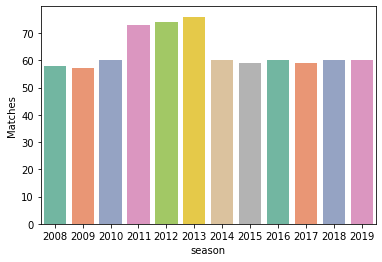

In [14]:
#Number of matches played in each season
ax=sns.countplot('season',data=df_matches,palette="Set2")
plt.ylabel('Matches')

This shows that most numbers of matches were played in the year 2013

In [15]:
#How many matches were played in each venue?
no_of_matches = df_matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches

,no_of_matches
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


It can be seen that M Chinnaswamy Stadium has hosted most matches.

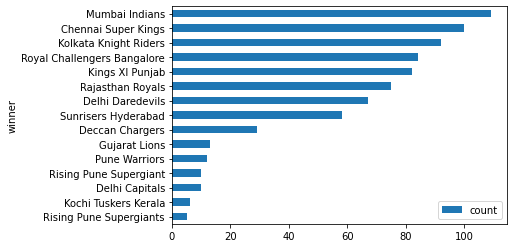

In [16]:
#Which team won the most matches?
df_matches.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

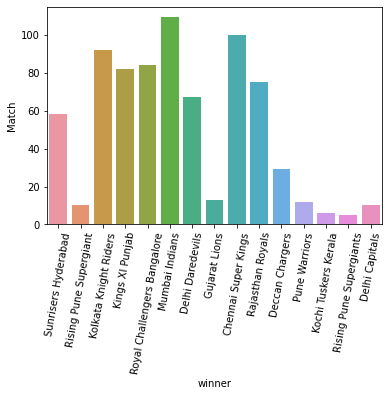

In [17]:
ax=sns.countplot(x='winner',data=df_matches)
plt.ylabel('Match')
plt.xticks(rotation=80)

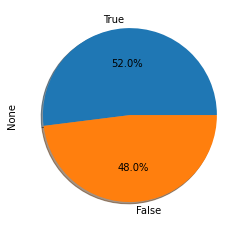

In [18]:
#Has toss-winning helped in winning the matches?
wins = df_matches['toss_winner'] == df_matches['winner']
ax = wins.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True)

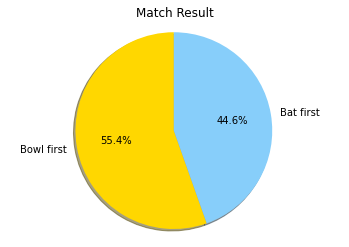

In [19]:
#Winning percentage of batting and bowling first
df_matches['win_by']=np.where(df_matches['win_by_runs']>0,'Bat first','Bowl first')
match=df_matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

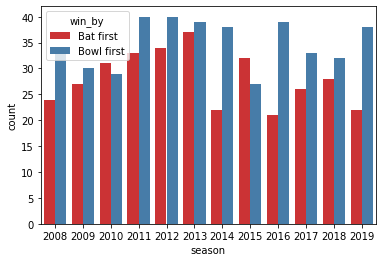

In [20]:
sns.countplot('season',hue='win_by',data=df_matches,palette="Set1")

In [21]:
#Which stadium is best for winning by runs (most number of wins)?
stats.mode(df_matches['venue'][df_matches['win_by_runs']!=0])

ModeResult(mode=array(['Wankhede Stadium'], dtype=object), count=array([35]))

In [22]:
#Which stadium is best for winning by wickets (most number of wins)?
stats.mode(df_matches['venue'][df_matches['win_by_wickets']!=0])

ModeResult(mode=array(['Eden Gardens'], dtype=object), count=array([45]))

In [23]:
#IPL Winners
final_matches=df_matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [24]:
#IPL Venues with Winners
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [25]:
#Man of the Match in the Finals
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [28]:
season_data=df_matches[['id','season','winner']]
complete_data=df_deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [39]:
#Leading Run Scorer
batsman_score=df_deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

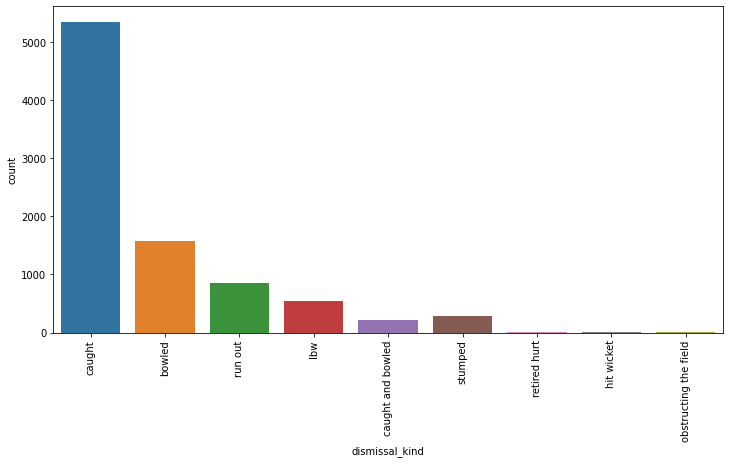

In [36]:
#dismissals in IPL
plt.figure(figsize=(12,6))
ax=sns.countplot(df_deliveries.dismissal_kind)
plt.xticks(rotation=90)

In [37]:
#dismissals by team
out=df_deliveries.groupby(['batting_team','dismissal_kind'])['dismissal_kind'].agg(['count'])

out.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index().sort_values(['batting_team','count'],ascending=[1,0]).set_index(['batting_team','dismissal_kind'])

count
batting_team        dismissal_kind          
Chennai Super Kings caught             62.32
                    bowled             15.38
                    run out             9.86
                    lbw                 5.87
                    stumped             3.64
...                                      ...
Sunrisers Hyderabad lbw                 4.66
                    stumped             2.83
                    caught and bowled   2.00
                    hit wicket          0.50
                    retired hurt        0.17

[102 rows x 1 columns]

In [41]:
#Who took the most tickets
wicket_data=df_deliveries.dropna(subset=['dismissal_kind'])
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127
